In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DLA import Grid

In [2]:
## run to create data

# steps = 300
# size = (100, 100)
# seed = (size[1]-1, int(size[1]/2))
# w = 1.85
# etas = np.linspace(0, 3, 10)
# epsilon = 1e-3

# for eta in etas:
#     model = Grid(size, w, eta, seed, steps, epsilon)
#     grid, iters = model.DLA()
#     np.savetxt(f'data eta/cluster_{eta}.csv', grid[-1], delimiter=',')
#     print(eta)

In [9]:
etas = np.linspace(0, 3, 10)
trees = [pd.read_csv(f'data eta\cluster_{eta}.csv', header=None) for eta in etas]

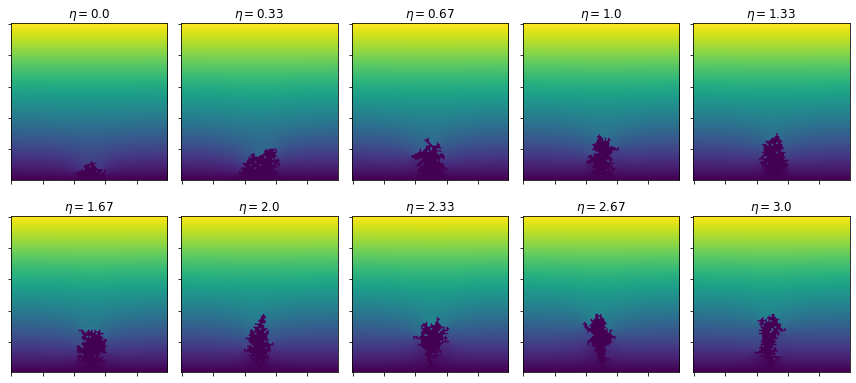

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(12, 8), sharex=True, sharey=True)

for i, tree in enumerate(trees):
    ax[i//5, i%5].imshow(tree)
    ax[i//5, i%5].tick_params(labelleft=False, labelbottom=False)
    ax[i//5, i%5].set_title(f'$\eta = {round(etas[i], 2)}$')
    
plt.subplots_adjust(wspace=0, hspace=-0.7)
fig.tight_layout()
plt.savefig('eta_clusters.pdf', bbox_inches='tight')
plt.show()

In [11]:
# calculate lentghs and widths

width = []
length = []

for tree in trees:
    
    # find all clustered cell excluding the sink
    body = np.where(tree[:-1]==0)
    
    length += [np.max(body[0]) - np.min(body[0])]
    width += [np.max(body[1]) - np.min(body[1])]

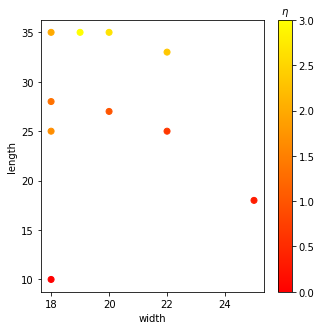

In [12]:
fig = plt.figure(figsize=(5, 5))

plt.scatter(width, length, c=etas, cmap=plt.cm.autumn)
cbar = plt.colorbar()
cbar.set_label('$\eta$', y=1.05, labelpad=-30, rotation=0)
plt.xlabel('width')
plt.ylabel('length')
plt.savefig('shape_scatter.pdf', bbox_inches='tight')
plt.show()

In [13]:
steps = 50
size = (50, 50)

# aanpassen naar t/m 2 evt meer waardes als dat lukt
omegas = np.linspace(1.70, 1.9, 5)
eta = 1
epsilon = 1e-3
seed = (-2, size[1]//2)

all_iters = {}

for omega in omegas:
    model = Grid(size, omega, eta, seed, steps, epsilon)
    grid, iters = model.DLA()
    all_iters[round(omega, 2)] = iters
    print(omega)

1.7
1.75
1.7999999999999998
1.8499999999999999
1.9


In [14]:
# all_iters = pd.DataFrame(all_iters)
# all_iters.to_csv('ietrs omega.csv')
print(all_iters)

{1.7: [11, 8, 8, 11, 13, 10, 7, 11, 15, 6, 6, 7, 9, 8, 8, 10, 6, 6, 7, 11, 10, 8, 14, 6, 10, 11, 8, 11, 7, 11, 12, 11, 12, 14, 15, 1, 13, 11, 1, 11, 12, 1, 8, 1, 1, 4, 15, 6, 5, 9], 1.75: [13, 15, 10, 10, 9, 15, 12, 17, 13, 9, 17, 8, 1, 16, 6, 7, 9, 9, 12, 6, 8, 15, 9, 7, 11, 1, 14, 5, 6, 13, 8, 1, 7, 7, 14, 13, 11, 12, 15, 12, 7, 9, 13, 1, 11, 7, 8, 12, 10, 15], 1.8: [15, 18, 12, 11, 13, 20, 12, 9, 16, 14, 15, 15, 11, 22, 22, 20, 1, 11, 4, 3, 1, 10, 19, 8, 17, 14, 6, 12, 6, 14, 1, 21, 15, 17, 17, 14, 11, 9, 1, 6, 20, 19, 20, 9, 18, 1, 5, 1, 18, 12], 1.85: [19, 13, 24, 23, 18, 15, 25, 36, 20, 20, 11, 1, 5, 13, 21, 6, 23, 16, 32, 33, 20, 7, 19, 6, 19, 1, 23, 29, 1, 12, 10, 23, 32, 5, 25, 1, 30, 18, 12, 4, 11, 26, 12, 12, 22, 10, 4, 30, 16, 21], 1.9: [34, 22, 45, 21, 16, 37, 54, 45, 15, 36, 20, 35, 32, 52, 37, 28, 11, 53, 46, 36, 50, 30, 28, 36, 31, 1, 5, 35, 43, 39, 19, 38, 14, 23, 12, 43, 1, 52, 29, 41, 28, 49, 31, 16, 16, 5, 35, 33, 5, 49]}
